**ARIMA** (Box-Jenkins Methodology)
Autoregressive Integrated Moving Average (ARIMA) is a class of time series forecasting methods which is different from other methods so far discussed. It is also known as Box-Jenkins methodology named after the statisticians who propounded the model. The general model is defined by the following equation.

Y_t=μ+α_1 Y_(t-1)+α_2 Y_(t-2)+⋯+α_p Y_(t-p)+ ε_t+β_1 ε_(t-1)+β_2 ε_(t-2)+⋯+β_q ε_(t-q)

It is different from other methods because it does not assume particular pattern in the historical data of the series to be forecast. It uses an iterative approach of model building. From a general class of models, it identifies a possible model and then checks the chosen model against the historical data. The initial selection of ARIMA model is based on an examination of ACF and PACF correlograms.

The ARIMA method in python is included in the library ‘statsmodels.tsa.arima_model’. The ARIMA  procedure is specified as follows:

Model = ARIMA(data, order = (p,d,q)
    Where
        p: order of AR process
        q: order of MA process
        d: oder of differencing.
        
Fit = Model.fit()
The fitted model object contains following information
Fit.summary()  -- Summary information
Fit.resid  -- residuals after the fit.
Fit.predict() – predicted values at given period.

The procedure is illustrated below:


In [2]:
import os
# os.chdir('C:/Users/Sid/Desktop/TimeSeries/Day2/Faculty_Notebook')

import numpy as np
import pandas as pd
from pandas import Series

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [3]:
# Exercise 1: Importing BASF Stock prices

gmasp = pd.read_excel('GMA_StockPrice.xlsx', sheet_name = 'data')

gmasp.head()

,year,mmm,month,BMW,RWE,VW,KAR,Siemens,BASF
0,1981,Jan,Jan-1981,71.641862,90.840781,101.203743,142.125043,180.720252,67.267076
1,1981,Feb,Feb-1981,72.058110,90.234885,100.461085,133.050295,171.694210,65.864130
2,1981,Mar,Mar-1981,74.685332,89.122195,109.201145,132.121064,173.017127,70.804041
3,1981,Apr,Apr-1981,83.580045,91.747120,114.595910,140.432850,181.780905,72.375145
4,1981,May,May-1981,83.374511,89.389479,111.601658,142.921121,179.199463,70.605226


In [4]:
# Here, we create time index. Our interest is BASF stock price. So we extract that column as a series.

gmasp.month = pd.to_datetime(gmasp.month)
gmasp.set_index('month', inplace=True)

BASF = Series(gmasp['BASF'])
print(type(BASF))
print(BASF.head())

<class 'pandas.core.series.Series'>
month
1981-01-01    67.267076
1981-02-01    65.864130
1981-03-01    70.804041
1981-04-01    72.375145
1981-05-01    70.605226
Name: BASF, dtype: float64


Text(0.5, 0, 'Year')

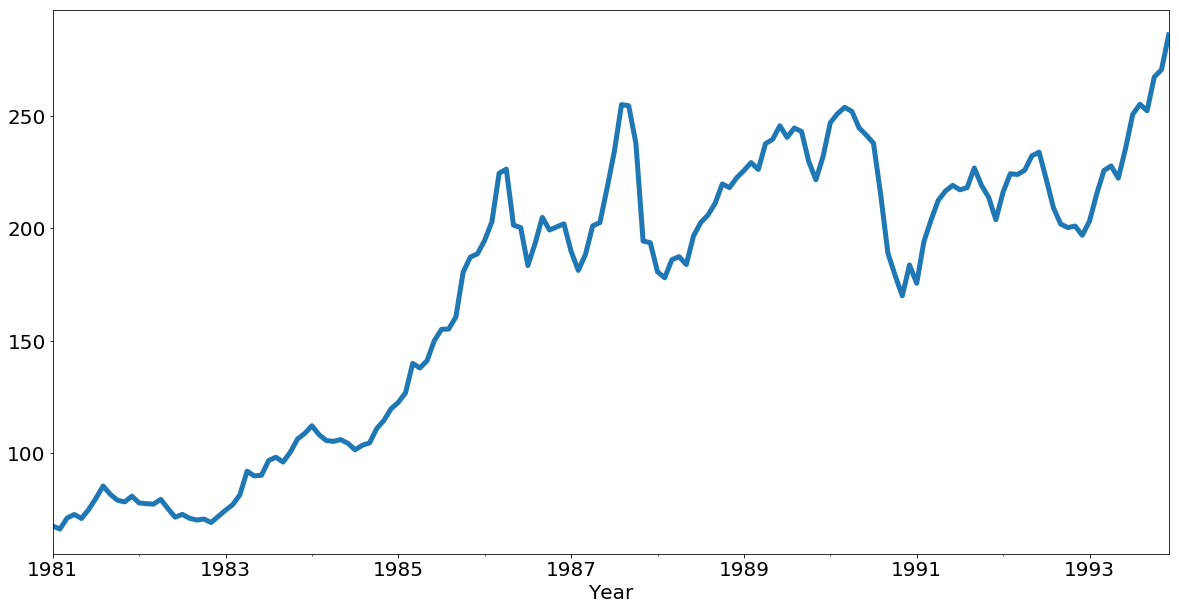

In [5]:
# Plot BASF time series

BASF.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

There is perceptible trend. We may check to see if the series is stationary by carrying out Dicky Fuller (ADF) test. 

In [6]:
# Test for stationarity - augmented Dicky Fuller test

adf = adfuller(BASF) 
print ('Test Statistic: ', adf[0])
print ('pvalue: ', adf[1])

Test Statistic:  -1.1130441645131621
pvalue:  0.7098421092190239


The p-value is greater than 0.05 and therefore the null hypothesis that the series is non-stationary cannot be rejected. Let us cross verify this correlogram plots.

D:\program\python\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


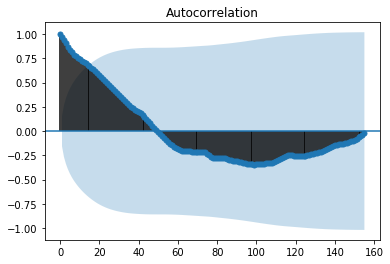

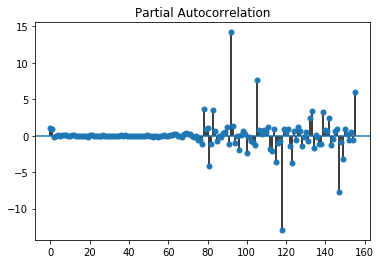

In [18]:
# Plot ACF and PACF for BASF series

plot_acf(BASF);

plot_pacf(BASF);

In [8]:
# Differencing once to make series stationary

BASFd = BASF.diff()

BASFd.head()

month
1981-01-01         NaN
1981-02-01   -1.402946
1981-03-01    4.939911
1981-04-01    1.571104
1981-05-01   -1.769919
Name: BASF, dtype: float64

Notice the missing value at period 0. Much of stats tests and models does not work with series with Nans. So we should drop the value.

In [9]:
BASFd = BASFd.dropna()

BASFd.head()

adf = adfuller(BASFd) 
print ('Test Statistic: ', adf[0])
print ('pvalue: ', adf[1])

Test Statistic:  -8.69861324182585
pvalue:  3.8635952946753753e-14


The p-value obtained is 4.e10-14, far less than 0.05. So we can reject null hypothesis of non-stationarity. The same fact is reinforced by the line, acf and pacf plots below.

Text(0.5, 0, 'Year')

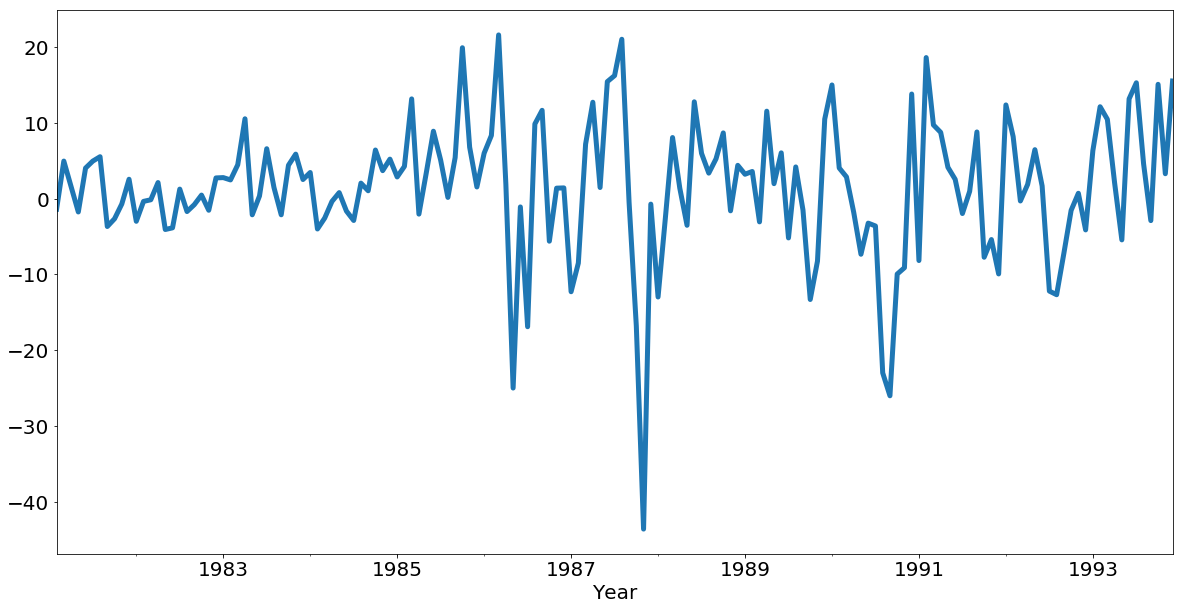

In [10]:
BASFd.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

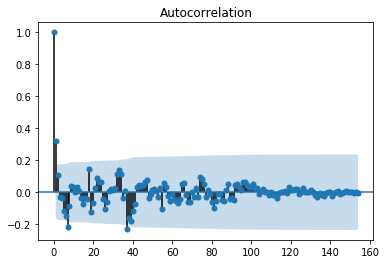

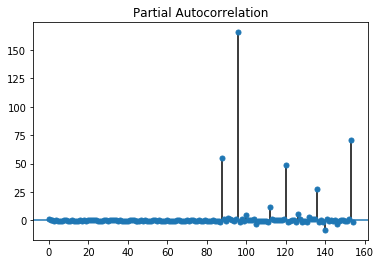

In [11]:
# Plot ACF and PACF for difference series

plot_acf(BASFd);

plot_pacf(BASFd);

Form PACF we see that the component at lag 1 is significant. Therefore we make the parameter p = 1. And remember we differenced the series once to make it stationary. so the parameter d = 1. Since acf plot does not have any significant spikes the q parmeter can be set to 0. i.e q = 0.

Therefore we will build below ARIMA(BASF, order = (1,1,0) model. Notice that we used BASF series since differencing is in-built into the ARIMA model.

In [12]:
# Build ARIMA(1,1,0) model for BASF data

BASFm = ARIMA(BASF, order=(1,1,0))
BASFar = BASFm.fit(disp=0)

# Display Results and plots

print(BASFar.summary())


D:\program\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\program\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
D:\program\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.BASF   No. Observations:                  155
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -550.007
Method:                       css-mle   S.D. of innovations              8.408
Date:                Tue, 22 Oct 2019   AIC                           1106.015
Time:                        15:00:28   BIC                           1115.145
Sample:                    02-01-1981   HQIC                          1109.723
                         - 12-01-1993                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4482      0.998      1.451      0.149      -0.508       3.405
ar.L1.D.BASF     0.3255      0.076      4.265      0.000       0.176       0.475
                                    Roots   

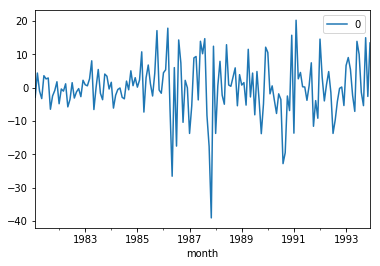

In [13]:
resids = pd.DataFrame(BASFar.resid)

resids.plot();

Let us now test to see if residuals are normally distributed by plotting kernel density estimation.

                0
count  155.000000
mean     0.005988
std      8.435177
min    -39.094795
25%     -3.750381
50%      0.056603
75%      4.414525
max     20.274378


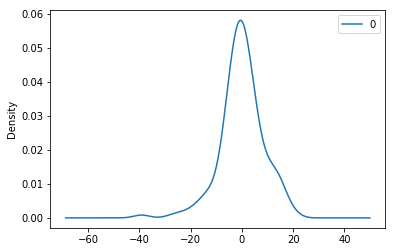

In [14]:
# Verify if the residuals normally distributed?

print(resids.describe())

resids.plot(kind='kde')

Let us compare forecast series against actually observed series. 

In [15]:
colnames = ['obs', 'est']
df = pd.DataFrame(columns = colnames)

for t in range(1, len(BASF)):
    obs = BASF[t].item()
    est = BASFar.predict(start=t, end=t, typ='levels').item()
    dfrow = pd.DataFrame({'obs':obs, 'est':est}, index=[t])
    df = df.append(dfrow)

print(df.head())
print(df.tail())

         obs        est
1  65.864130  68.715320
2  70.804041  66.384378
3  72.375145  73.388741
4  70.605226  73.863377
5  74.624432  71.006034
            obs         est
151  255.422727  256.790568
152  252.513636  257.889397
153  267.576190  252.543670
154  270.847619  273.455575
155  286.342857  272.889267


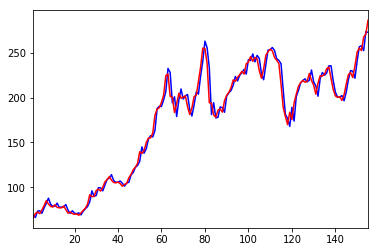

In [16]:
df.est.plot(color='blue')
df.obs.plot(color='red')

Finally, let us use the model for forecasting for 156 period.

In [17]:
# Predicting time series value at next period

t= 156
est = BASFar.predict(start=t, end=t, typ='levels').item()
print ('Y at period 156 is: ', est)

Y at period 156 is:  292.36307016069895


D:\program\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


------------------------------------- End of Lab Session ----------------------------------